In [1]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol
ticker_symbol = 'AAPL'

# Define the time period for the data
start_date = '2000-01-01'
end_date = '2023-01-01'

# Download the stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.844981  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.773741  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.785063  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.717125  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.751094  460734400


In [2]:
# Handle missing values
stock_data = stock_data.dropna()

# Feature Engineering (e.g., creating moving averages)
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()

# Data Splitting
train_data = stock_data[:int(0.8*len(stock_data))]
test_data = stock_data[int(0.8*len(stock_data)):]

In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,MA_50
Date,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800,NaN
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600,NaN
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600,NaN
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800,NaN
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400,NaN
...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782578,63814900,144.131800
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800,143.964799
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010117,85438400,143.637399


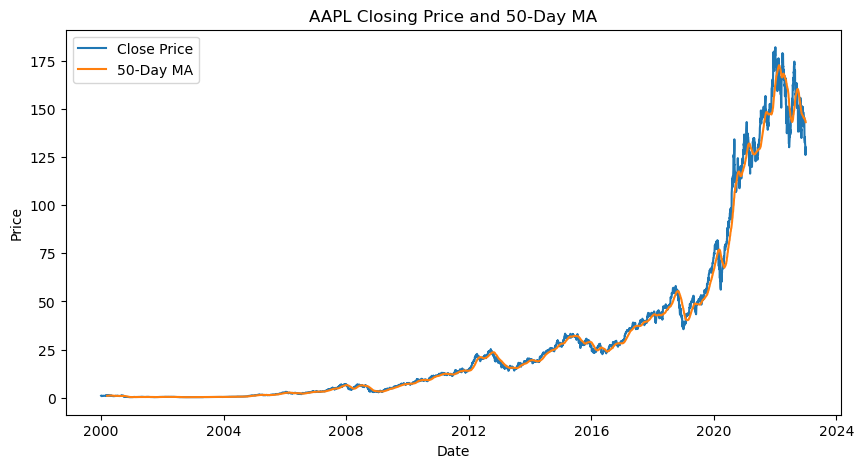

In [4]:
import matplotlib.pyplot as plt

# Plot the closing price
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA_50'], label='50-Day MA')
plt.title('AAPL Closing Price and 50-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare the data for LSTM


def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)


look_back = 50
train_data = train_data['Close'].values.reshape(-1, 1)
test_data = test_data['Close'].values.reshape(-1, 1)

X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Forecasting
lstm_forecast = lstm_model.predict(X_test)

/Users/vignesh/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2796/4578 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 27.5635

KeyboardInterrupt: 